In [702]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize
from scipy.odr import *
from uncertainties import ufloat, umath
import statistics
%matplotlib inline
from uncertainties import unumpy
from uncertainties import ufloat

In [703]:
length = unumpy.uarray([20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], [0.1] * 11)/100
time = unumpy.uarray([107.758, 102.098, 139.565, 145.962, 147.8, 146.833, 136.5, 161, 123.512, 115.3, 117.5], [3/60] * 11)
n_of_oscilations = unumpy.uarray([119, 93, 110, 101, 95, 88, 75, 84, 61, 54, 52], [1] * 11)
period = time/n_of_oscilations

x_err = 3 / 60

In [704]:
def f(p, l):
    a, b = p
    return a*l**b

model = Model(f)
data = RealData(unumpy.nominal_values(length), unumpy.nominal_values(period), sx=unumpy.std_devs(length))
myodr = ODR(data, model, beta0=[2, 0.5])
out = myodr.run()

a = ufloat(out.beta[0], out.sd_beta[0])
b = ufloat(out.beta[1], out.sd_beta[1])
print("Fit parameters: \n", f"a: {a} \n", f"b: {b} \n")

print("In our equation: \n", f"k: {a} \n", f"n: {b} \n")


Fit parameters: 
 a: 2.034+/-0.007 
 b: 0.512+/-0.007 

In our equation: 
 k: 2.034+/-0.007 
 n: 0.512+/-0.007 



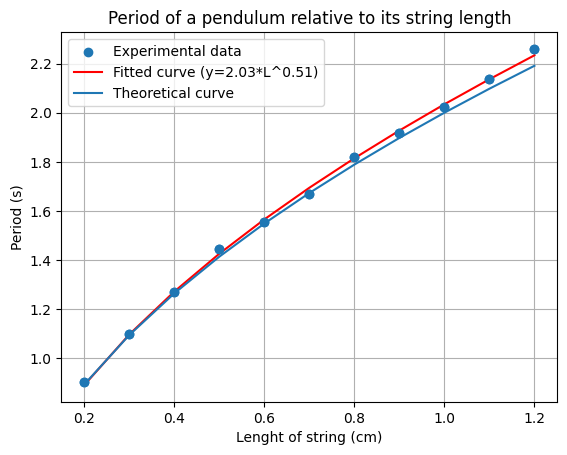

In [705]:
fig, ax = plt.subplots()

ax.scatter(unumpy.nominal_values(length), unumpy.nominal_values(period), label="Experimental data")

#Fitted trend
ax.plot(unumpy.nominal_values(length), f(out.beta, unumpy.nominal_values(length)) , 'r-', label=f'Fitted curve (y={str(a.n)[:4]}*L^{str(b.n)[:4]})')

#Theretical period line
ax.plot(unumpy.nominal_values(length), 2 * np.sqrt(unumpy.nominal_values(length)), label="Theoretical curve")



ax.set(xlabel='Lenght of string (cm)', ylabel='Period (s)',
       title='Period of a pendulum relative to its string length')

ax.grid()

ax.errorbar(unumpy.nominal_values(length), unumpy.nominal_values(period), yerr=0, xerr=unumpy.std_devs(length), fmt="o", color="tab:blue")




plt.legend(loc="upper left")
# save graph
plt.savefig('period_lenght.png', dpi=700)

/var/folders/rr/72_zxrgd2jnb8qcmt6svyckr0000gn/T/ipykernel_70576/2689353763.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(unumpy.nominal_values(length), unumpy.nominal_values(period)  - 2 * np.sqrt(unumpy.nominal_values(length)), 'ko', label="Period", color="tab:blue")


<Figure size 640x480 with 0 Axes>

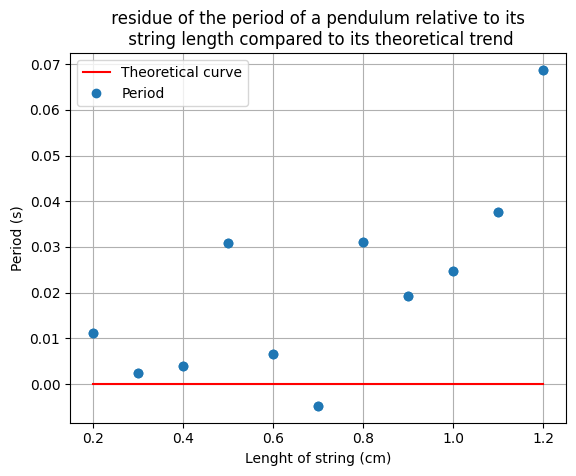

In [706]:
# residual of theretical curve
plt.clf()
fig, ax = plt.subplots()
ax.set(xlabel='Lenght of string (cm)', ylabel='Period (s)',
       title=' residue of the period of a pendulum relative to its \n string length compared to its theoretical trend')
ax.grid()
ax.plot(unumpy.nominal_values(length), [0] * unumpy.nominal_values(length), 'r-', label="Theoretical curve", zorder=10)
ax.plot(unumpy.nominal_values(length), unumpy.nominal_values(period)  - 2 * np.sqrt(unumpy.nominal_values(length)), 'ko', label="Period", color="tab:blue")
ax.errorbar(unumpy.nominal_values(length), unumpy.nominal_values(period) - 2 * np.sqrt(unumpy.nominal_values(length)), yerr=0, xerr=unumpy.std_devs(length), fmt="o")

ax.legend()

plt.savefig('period_lenght_residue_theoretical.png', dpi=700)

/var/folders/rr/72_zxrgd2jnb8qcmt6svyckr0000gn/T/ipykernel_70576/1208508767.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(unumpy.nominal_values(length), unumpy.nominal_values(period)  - f(out.beta, unumpy.nominal_values(length)), 'ko', label="Period", color="tab:blue")


<Figure size 640x480 with 0 Axes>

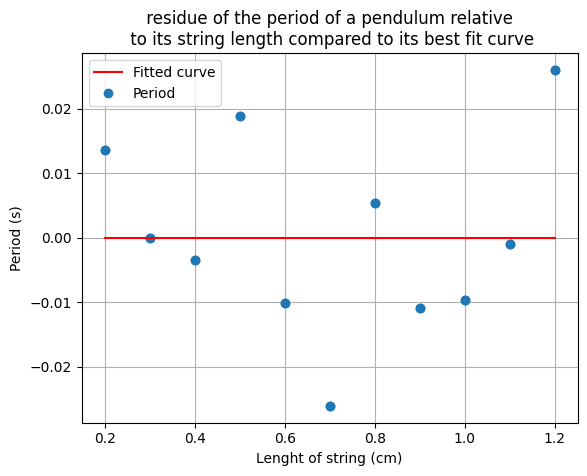

In [707]:
# residual of fitted curve
plt.clf()
fig, ax = plt.subplots()
ax.set(xlabel='Lenght of string (cm)', ylabel='Period (s)',
       title=' residue of the period of a pendulum relative \n to its string length compared to its best fit curve')
ax.grid()
ax.plot(unumpy.nominal_values(length), [0] * unumpy.nominal_values(length), 'r-', label="Fitted curve", zorder=10)
ax.plot(unumpy.nominal_values(length), unumpy.nominal_values(period)  - f(out.beta, unumpy.nominal_values(length)), 'ko', label="Period", color="tab:blue")
ax.errorbar(unumpy.nominal_values(length), unumpy.nominal_values(period) - f(out.beta, unumpy.nominal_values(length)), yerr=0, xerr=unumpy.std_devs(length), fmt="o")

ax.legend()

plt.savefig('period_lenght_residue_fit.png', dpi=700)

In [708]:
# get r^2
residuals = unumpy.nominal_values(period)  - f(out.beta, unumpy.nominal_values(length))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((unumpy.nominal_values(period)-np.mean(unumpy.nominal_values(period)))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R^2 is {r_squared}")

R^2 is 0.9988160871764433


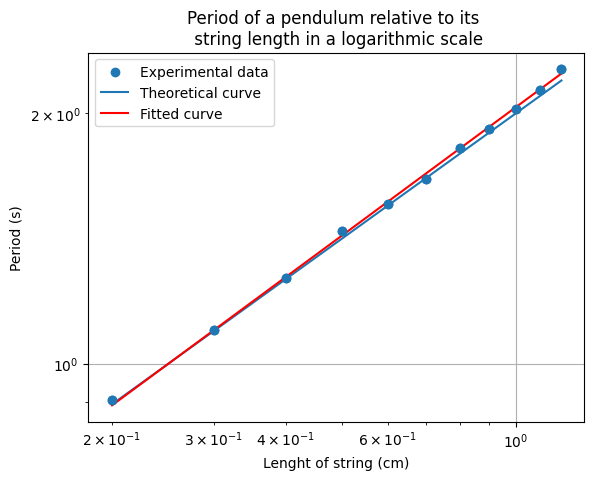

In [709]:
fig, ax = plt.subplots()

ax.scatter(unumpy.nominal_values(length), unumpy.nominal_values(period), label="Experimental data")

#Theretical period line
ax.plot(unumpy.nominal_values(length), 2 * np.sqrt(unumpy.nominal_values(length)), label="Theoretical curve")

#Fitted trend
ax.plot(unumpy.nominal_values(length), f(out.beta, unumpy.nominal_values(length)) , 'r-', label="Fitted curve")

ax.set(xlabel='Lenght of string (cm)', ylabel='Period (s)',
       title='Period of a pendulum relative to its \n string length in a logarithmic scale')

ax.grid()

ax.errorbar(unumpy.nominal_values(length), unumpy.nominal_values(period), yerr=0, xerr=unumpy.std_devs(length), fmt="o", color="tab:blue")

plt.legend(loc="upper left")
ax.set_yscale('log')
ax.set_xscale('log')

plt.savefig('period_lenght_loglog.png', dpi=700)

In [710]:
def lin(p, l):
    a, b = p
    return a*l + b

def quad(p, l):
    a, b, c = p
    return a*l**2 + b*l + c

def power(p, l):
    a,b = p
    return a*l**b

def exp(p, l):
    a,b = p
    return a*b**l

funcs = [[lin, [1, 1]], [quad, [1,1,1]], [power, [1,1]], [exp, [1,1]]]

params = []
r2 = []

for n, func in enumerate(funcs):
    model = Model(func[0])
    data = RealData(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations*4), sx=unumpy.std_devs(length), sy=unumpy.std_devs(n_of_oscilations*4))
    myodr = ODR(data, model, beta0=func[1])
    out = myodr.run()
    
    funcs[n] += [[ufloat(out.beta[n], out.sd_beta[n]) for n in range(len(out.beta))]]
    params += [[ufloat(out.beta[n], out.sd_beta[n]) for n in range(len(out.beta))]]
    
    residuals = unumpy.nominal_values(n_of_oscilations*4)  - func[0](out.beta, unumpy.nominal_values(length))
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((unumpy.nominal_values(n_of_oscilations*4)-np.mean(unumpy.nominal_values(period)))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    r2 += [r_squared]
    
params



/var/folders/rr/72_zxrgd2jnb8qcmt6svyckr0000gn/T/ipykernel_70576/2103768194.py:11: RuntimeWarning: overflow encountered in power
  return a*l**b
/var/folders/rr/72_zxrgd2jnb8qcmt6svyckr0000gn/T/ipykernel_70576/2103768194.py:15: RuntimeWarning: invalid value encountered in power
  return a*b**l


[[-251.76916801796992+/-30.692349466440106,
  515.1475085106231+/-23.575235930302533],
 [-113.59640955276093+/-109.49370575396809,
  -92.7000374507248+/-156.25194258224099,
  470.8209822107301+/-48.6907164928493],
 [279.82213226122445+/-18.50299597781976,
  -0.35787401581570955+/-0.07185121728088698],
 [546.346435031543+/-36.630133970353995,
  0.4881936755620106+/-0.05141030486359833]]

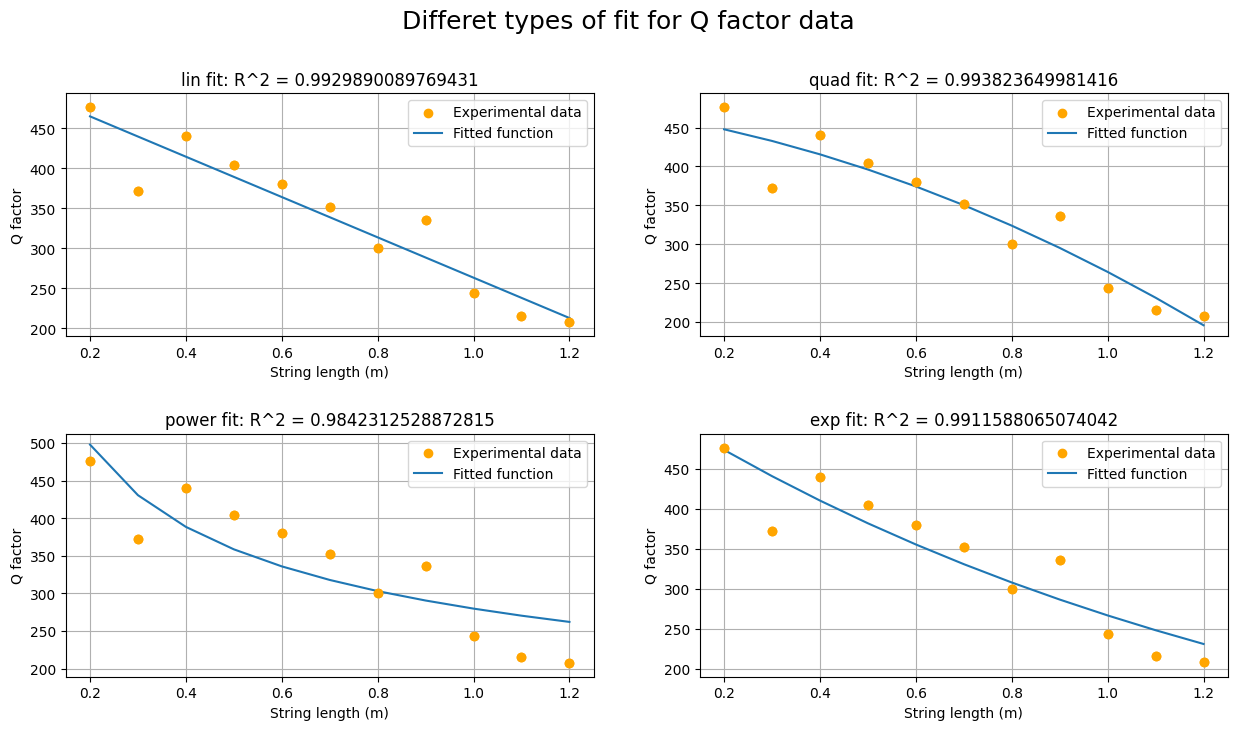

In [711]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Differet types of fit for Q factor data", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, function in enumerate(funcs):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    ax.scatter(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations*4), label="Experimental data", color="orange")
    ax.plot(unumpy.nominal_values(length), function[0](unumpy.nominal_values(function[2]), unumpy.nominal_values(length)), label="Fitted function")
    # chart formatting
    ax.set(xlabel='String length (m)', ylabel='Q factor',
       title=f"{function[0].__name__} fit: R^2 = {r2[n]}")
    ax.errorbar(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations*4),yerr=unumpy.std_devs(n_of_oscilations*4), xerr=unumpy.std_devs(length), fmt="o", color="orange")
    ax.legend()
    ax.grid()
    
plt.savefig('length_Q_many.png', dpi=700)

In [717]:
def quad(p, l):
    a, b, c = p
    return a*l**2 + b*l + c

model = Model(quad)
data = RealData(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations*4), sx=unumpy.std_devs(length), sy=unumpy.std_devs(n_of_oscilations*4))
myodr = ODR(data, model, beta0=[1,1, 1])
out = myodr.run()

a = ufloat(out.beta[0], out.sd_beta[0])
b = ufloat(out.beta[1], out.sd_beta[1])
c = ufloat(out.beta[2], out.sd_beta[2])

print("Fit parameters: \n", "a: {:.3u} \n".format(a), "b: {:.3u} \n".format(b), "c: {:.3u} \n".format(c))

Fit parameters: 
 a: -114+/-109 
 b: -93+/-156 
 c: 470.8+/-48.7 



In [ ]:
fig, ax = plt.subplots()

ax.scatter(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations)*4, label="Experimental data", color="orange")
ax.plot(unumpy.nominal_values(length), quad((a.n,b.n, c.n), unumpy.nominal_values(length)), label="Fitted function")

ax.set(xlabel='Lenght of string (cm)', ylabel='Q factor',
       title='Q factor of a pendulum relative to its string length', ylim=0)

ax.grid()

ax.errorbar(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations*4),yerr=unumpy.std_devs(n_of_oscilations*4), xerr=unumpy.std_devs(length), fmt="o", color="orange")

plt.legend(loc="upper left")

plt.savefig('length_Q_best.png', dpi=700)

In [ ]:
residuals = unumpy.nominal_values(n_of_oscilations*4)  - quad(out.beta, unumpy.nominal_values(length))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((unumpy.nominal_values(n_of_oscilations*4)-np.mean(unumpy.nominal_values(period)))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"r^2 of the fit: {r_squared}")

In [ ]:
# residual of fitted curve
plt.clf()
fig, ax = plt.subplots()
ax.set(xlabel='Lenght of string (cm)', ylabel='Q factor',
       title=' residue of the Q factor of a pendulum relative \n to its string length compared to its best fit curve')
ax.grid()
ax.plot(unumpy.nominal_values(length), [0] * unumpy.nominal_values(length), 'r-', label="Fitted curve", zorder=10)
ax.plot(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations*4)  - quad(out.beta, unumpy.nominal_values(length)), 'ko', label="Q factor", color="orange")
ax.errorbar(unumpy.nominal_values(length), unumpy.nominal_values(n_of_oscilations*4)  - quad(out.beta, unumpy.nominal_values(length)),yerr=unumpy.std_devs(n_of_oscilations*4), xerr=unumpy.std_devs(length), fmt="o", color="orange")
ax.legend()

plt.savefig('Q_lenght_residue_fit.png', dpi=700)